In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from itertools import combinations
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np

In [5]:
game_data = pd.read_csv('data/game_info.csv')
temp = game_data['Avg_Userscore'].value_counts()

In [6]:
temp.to_string()

'8.2              286\n8.3              279\n8.4              269\n8.5              269\n8.0              268\n7.8              257\n8.1              245\n7.9              240\n8.6              223\n7.6              217\n7.7              202\n8.7              196\n7.5              175\n8.8              174\n8.9              158\n7.3              139\n7.4              114\n7.2              112\n7.1              110\n7.0               84\n6.8               78\ntbd               75\n6.7               72\n9.0               71\n6.9               68\n6.6               66\n6.5               44\n9.1               43\n6.1               41\n6.3               41\n6.4               39\n6.2               33\n6.0               28\n5.9               27\n5.8               25\n9.2               21\n5.5               20\n5.7               18\n5.4               14\n5.6               14\n5.2               13\nnot specified     12\n4.3               12\n5.1               11\n5.0                9\n4.4      

In [7]:
user_data_train = pd.read_csv('data/user_data_train_no_comments.csv')
user_data_train_mean_userscore = user_data_train['Userscore'].mean()

In [8]:
user_data_test=pd.read_csv('data/user_data_test_no_comments.csv')

In [9]:
tf = TfidfVectorizer(analyzer=lambda s: map(lambda c: c.lower(), s.split(';')))
tfidf_matrix = tf.fit_transform(game_data['Genre'])
tfidf_matrix

<5000x150 sparse matrix of type '<class 'numpy.float64'>'
	with 17711 stored elements in Compressed Sparse Row format>

In [10]:
pd.DataFrame(tfidf_matrix.todense(), columns=tf.get_feature_names(),   index=game_data.Title)

,2d,3d,4x,action,action adventure,action rpg,adventure,alternative,application,arcade,...,vehicle,vertical,virtual,virtual life,visual novel,wakeboarding,wargame,western-style,wrestling,wwii
Title,,,,,,,,,,,,,,,,,,,,,
The Legend of Zelda: Ocarina of Time,0.000000,0.000000,0.0,0.000000,0.633865,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tony Hawk's Pro Skater 2,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.623685,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Grand Theft Auto IV,0.000000,0.000000,0.0,0.000000,0.329708,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SoulCalibur,0.000000,0.629232,0.0,0.342612,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Grand Theft Auto IV,0.000000,0.000000,0.0,0.000000,0.329708,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Donut County,0.000000,0.000000,0.0,0.000000,0.769338,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MotorStorm: Apocalypse,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Last Guy,0.000000,0.000000,0.0,0.000000,0.366705,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim.shape

(5000, 5000)

In [12]:
def convert_game_to_index(title, platform):
    """Converts given title and platform to an index (note: in future versions we should reformat data)"""
    return game_data[game_data['Title'] == title][game_data['Platform'] == platform]['Unnamed: 0'].iloc[0]

In [13]:
def baseline_rating(username):
    """ Returns the squared difference of the actual value from the mean userscore """
    list_of_ratings=user_data_test[user_data_test['Username'] == username]
    query=list_of_ratings.tail()
    return (user_data_train_mean_userscore-query['Userscore'].iloc[0])**2

In [289]:
def score_to_rating(w, predicted_score, num_similar_games):
    """Simple linear model which goes from predicted score-> actual score"""
    result=w[0]*predicted_score+w[1]
    #print(result)
    if(result>10):
        return 10
    elif(result<0):
        return 0
    return result

def update_weights(w, predicted_score, actual_score, alpha):
    difference=(w[0]*predicted_score+w[1]-actual_score)
    # Updates according to gradient descent 
    wnew1=w[0]-2*alpha*difference*predicted_score
    wnew2=w[1]-2*alpha*difference
    if(wnew1<0):
        wnew1=w[0]
    if(wnew2>10):
        wnew2=w[1]
    return [wnew1, wnew2]

In [48]:
x1=[]
x2=[]
x3=[]

In [318]:
def predict_rating(username, w, is_training):
    # Get all ratings from the user
    if(is_training):
        list_of_ratings = user_data_train[user_data_train['Username'] == username]
    else:
        list_of_ratings=user_data_test[user_data_test['Username'] == username]

    # Choose a rating to hide and predict its score.
    query = list_of_ratings.iloc[0]
    query_game = convert_game_to_index(query['Title'], query['Platform'])
    # print('Queried Game')
    # print(game_data.iloc[query_game])

    epsilon = 10**-6
    predicted_score = 0
    total_cos_sim=0
    num_similar_games = 0 # number of games that have some cosine similarity to the query game
    for index, r in list_of_ratings.iterrows():
            game = convert_game_to_index(r['Title'], r['Platform'])
            cos_sim = cosine_sim[game, query_game]
            
            # If cosine similarity is non-zero, consider the user's score for this game in our predicted score
            if(abs(cos_sim) > epsilon) and game != query_game:
                # compute the predicted score via an average (computed iteratively)
                num_similar_games += 1
                total_cos_sim+=cos_sim
                predicted_score+= cos_sim*r['Userscore'] 

    # If the user has not reviewed any similar game, then predict the average userscore of the queried game
    if not num_similar_games:
        predicted_score = user_data_train_mean_userscore
    else:
        predicted_score=(predicted_score)/(total_cos_sim)
        if(is_training):
            x1.append(predicted_score)
            x2.append(num_similar_games)
            x3.append(query['Userscore'])
            w=update_weights(w, predicted_score, query['Userscore'], 0.01)
        predicted_score=score_to_rating(w, predicted_score, num_similar_games)
    # Predicted rating after normalization minus actual score
    return (predicted_score - query['Userscore'])**2, w

In [319]:
user_name_trains = user_data_train['Username'].value_counts().index.tolist()
user_name_tests = user_data_test['Username'].value_counts().index.tolist()
print(len(user_name_trains))
print(len(user_name_tests))


28672
8193


In [320]:
total_error=0

w=[1,1]
is_training=True 
for u in user_name_trains:
    error,w=predict_rating(u, w, is_training)
    #print(error,w)
    total_error=total_error+error

print("Content-Based Filtering Training Error", sqrt(total_error/(len(user_name_trains))))







#print("Baseline Error", sqrt(total_baselineerror/(len(user_name_list))))



<ipython-input-12-9a25e70527bb>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return game_data[game_data['Title'] == title][game_data['Platform'] == platform]['Unnamed: 0'].iloc[0]


Content-Based Filtering Training Error 3.0654688816386777


In [321]:
w

[1.587110282211329, 0.5346428918096564]

Cite our sources: https://towardsdatascience.com/content-based-recommender-systems-28a1dbd858f5
Write up results in paper

In [322]:
is_training=False
train_error=0
for u in user_name_tests:
    error=predict_rating(u,w, is_training)[0]
    train_error=train_error+error

print("Content-Based Filtering Testing Error", sqrt(train_error/(len(user_name_tests))))

<ipython-input-12-9a25e70527bb>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return game_data[game_data['Title'] == title][game_data['Platform'] == platform]['Unnamed: 0'].iloc[0]


Content-Based Filtering Testing Error 3.1957939533817257


# Justin: My attempts at linear regression below, they went poorly :-(

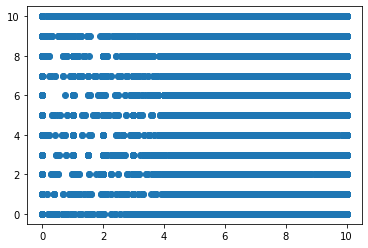

In [308]:
plt.scatter(x1, x3)

In [310]:
np.mean(x1)
np.mean(x3)

8.020570090066313

In [234]:
#x=[[x1[i], x2[i]] for i in range(len(x1))]
x=np.array(x1).reshape((-1, 1))

In [311]:
y=np.array(x3)

np.cov(np.array(x1), np.array(x3))

array([[6.80567272, 2.43992748],
       [2.43992748, 8.88961497]])

In [279]:
model = LinearRegression().fit(x_, y)

In [280]:
r_sq = model.score(x_, y)
print('coefficient of determination:', r_sq)

coefficients=model.coef_
print(coefficients)

coefficient of determination: 0.11776979566518397
[0.3502422]


In [229]:
mean(x1)
mean(x3)

8.002707950132843

In [57]:
from numpy import mean

In [63]:
mean(x1)

4.829969902258525

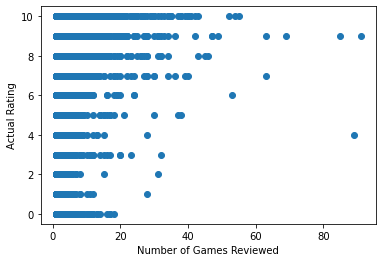

In [153]:
plt.xlabel("Number of Games Reviewed")
plt.ylabel("Actual Rating")
plt.scatter(x2, x3)

In [299]:
mean(x1)
mean(x3)

8.029086479902558

In [ ]:
from statistics import mean

In [ ]:
mean(x3)

8

# Justin note: this function is from https://towardsdatascience.com/content-based-recommender-systems-28a1dbd858f5

In [121]:


def genre_recommendations(i, M, items, k=100):
    """
    Recommends movies based on a similarity dataframe
    Parameters
    ----------
    i : str
        Movie title (index of the similarity dataframe)
    M : pd.DataFrame
        Similarity dataframe, symmetric, with movies as indices and columns
    items : pd.DataFrame
        Contains both the title and some other features used to define similarity
    k : int
        Amount of recommendations to return
    """
    if(len(M.loc[:,i].shape))>1:
        ix = M.loc[:,i].iloc[:,0].to_numpy().argpartition(range(-1,-k,-1))
        print(ix)
    else:
        ix=M.loc[:,i].to_numpy().argpartition(range(-1,-k,-1))
        #print(ix[-1])
        for i in ix[-1:(-k+2):-1]:
            #print(i)
            print(cosine_sim[ix[-1]][i])
            print(game_data[game_data['Unnamed: 0']==i][['Title', 'Genre']])
    closest = M.columns[ix[-1:-(k+2):-1]]
    #closest = closest.drop(i, errors='ignore')
    return pd.DataFrame(closest).drop_duplicates().merge(items).head(k)

In [122]:
genre_recommendations('The Legend of Zelda: Ocarina of Time', cosine_sim_df, game_data[['Title', 'Genre']])

1.0
                                  Title                     Genre
0  The Legend of Zelda: Ocarina of Time  Action Adventure;Fantasy
1.0
                 Title                     Genre
86  Ninja Gaiden Black  Action Adventure;Fantasy
1.0
                            Title                     Genre
4368  Sphinx and the Cursed Mummy  Action Adventure;Fantasy
1.0
          Title                     Genre
101  God of War  Action Adventure;Fantasy
1.0
                      Title                     Genre
2645  Thief: Deadly Shadows  Action Adventure;Fantasy
1.0
                            Title                     Genre
4207  Sphinx and the Cursed Mummy  Action Adventure;Fantasy
1.0
                                 Title                     Genre
2239  Prince of Persia: Warrior Within  Action Adventure;Fantasy
1.0
                            Title                     Genre
4172  Sphinx and the Cursed Mummy  Action Adventure;Fantasy
1.0
                                   Title            

1489  Action Adventure;Fantasy;General;Fantasy  
0.9118988929718546
                         Title                                     Genre
4443  LEGO Marvel Super Heroes  Action Adventure;Fantasy;General;Fantasy
0.9118988929718546
                         Title                                     Genre
2466  LEGO Marvel Super Heroes  Action Adventure;Fantasy;General;Fantasy
0.9118988929718546
                Title                                     Genre
3230  Ninja Gaiden II  Action Adventure;Fantasy;General;Fantasy
0.9118988929718546
                         Title                                     Genre
2452  LEGO Marvel Super Heroes  Action Adventure;Fantasy;General;Fantasy
0.9118988929718546
                   Title                                     Genre
2043  Beyond Good & Evil  Action Adventure;Fantasy;General;Fantasy
0.9118988929718546
                              Title                                     Genre
2185  Oddworld: Stranger's Wrath HD  Action Adventure;Fanta

,Title,Genre
0,The Legend of Zelda: Ocarina of Time,Action Adventure;Fantasy
1,Ninja Gaiden Black,Action Adventure;Fantasy
2,Sphinx and the Cursed Mummy,Action Adventure;Fantasy
3,Sphinx and the Cursed Mummy,Action Adventure;Fantasy
4,Sphinx and the Cursed Mummy,Action Adventure;Fantasy
...,...,...
95,Okami HD,Action Adventure;General
96,Okami HD,Fantasy;Fantasy;Action Adventure;General
97,Okami HD,Action Adventure;General
98,Okami HD,Action Adventure;General


In [65]:
cosine_sim_df=pd.DataFrame(cosine_sim, columns=game_data.Title, index=game_data.Title)

In [ ]:
cosine_sim_df.loc[:,'The Legend of Zelda: Ocarina of Time'].to_numpy().argpartition(range(-1,-10,-1))

array([2275, 2499, 4998, ..., 4938,   49,    0])

In [ ]:
cosine_sim_df=cosine_sim_df.drop_duplicates()

In [ ]:
cosine_sim_df = cosine_sim_df.loc[:,~cosine_sim_df.columns.duplicated()]

In [ ]:
cosine_sim_df=cosine_sim_df.drop_duplicates()

In [ ]:
new_df=cosine_sim_df.loc[:,'The Legend of Zelda: Ocarina of Time']

In [ ]:
new_df.iloc[:,0].head()

Title
The Legend of Zelda: Ocarina of Time    0.000000
Tony Hawk's Pro Skater 2                0.138187
Grand Theft Auto IV                     0.000000
SoulCalibur                             0.000000
Grand Theft Auto IV                     0.000000
Name: NBA 2K17, dtype: float64

In [ ]:
len(new_df.shape)

1

(array([ 3178.,   892.,  1083.,  1305.,  3749.,  4062.,  5496.,  8493.,
        12700., 19664.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

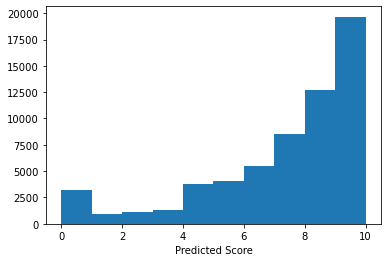

In [316]:
plt.xlabel("Predicted Score")
plt.hist(x1, bins=10)

(array([ 3686.,  1170.,   981.,  1199.,  1383.,  1968.,  2136.,  3136.,
         4927., 40036.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

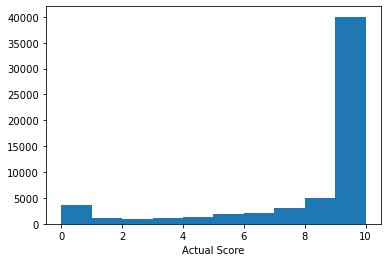

In [317]:
plt.xlabel("Actual Score")
plt.hist(x3, bins=10)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3989b4d4-9be9-497d-838f-5481bae9e63b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>